<a href="https://www.kaggle.com/code/anshudhiman/decision-trees-car-evaluation?scriptVersionId=126747437" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # **Decision tree Classifier- To predict the safety of the car**

# Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Import Dataset

In [2]:
car_data = pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv', header=None)

# Exploratory Data Analysis

In [3]:
print("Length of Car data is {}".format(len(car_data)))

Length of Car data is 1728


In [4]:
# to view dimensions of dataset
print("Shape of Car data is {}".format(car_data.shape))

Shape of Car data is (1728, 7)


In [5]:
# 1st five entries in the data
car_data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Renaming columns
### We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns.

In [6]:
col_names = ['BuyingPrice', 'MaintenanceCost', 'num_Doors', 'num_persons', 'lug_boot', 'safety', 'decision']

car_data.columns = col_names

In [7]:
car_data.head()

,BuyingPrice,MaintenanceCost,num_Doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### View summary of dataset

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BuyingPrice      1728 non-null   object
 1   MaintenanceCost  1728 non-null   object
 2   num_Doors        1728 non-null   object
 3   num_persons      1728 non-null   object
 4   lug_boot         1728 non-null   object
 5   safety           1728 non-null   object
 6   decision         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
# Statistical Values for data
car_data.describe()

,BuyingPrice,MaintenanceCost,num_Doors,num_persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


### Frequency distribution of values in variables


In [10]:
col_names = ['BuyingPrice', 'MaintenanceCost', 'num_Doors', 'num_persons', 'lug_boot', 'safety', 'decision']



for col in col_names:
  print(car_data[col].value_counts())
  print()
  print("*************************************************")

vhigh    432
high     432
med      432
low      432
Name: BuyingPrice, dtype: int64

*************************************************
vhigh    432
high     432
med      432
low      432
Name: MaintenanceCost, dtype: int64

*************************************************
2        432
3        432
4        432
5more    432
Name: num_Doors, dtype: int64

*************************************************
2       576
4       576
more    576
Name: num_persons, dtype: int64

*************************************************
small    576
med      576
big      576
Name: lug_boot, dtype: int64

*************************************************
low     576
med     576
high    576
Name: safety, dtype: int64

*************************************************
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64

*************************************************


## Summary of variables
### There are 7 variables in the dataset. All the variables are of categorical data type, where decision is the target variable.Also The class target variable is ordinal in nature.

In [11]:
# check missing values in variables

car_data.isnull().sum()

BuyingPrice        0
MaintenanceCost    0
num_Doors          0
num_persons        0
lug_boot           0
safety             0
decision           0
dtype: int64

<AxesSubplot:xlabel='decision', ylabel='count'>

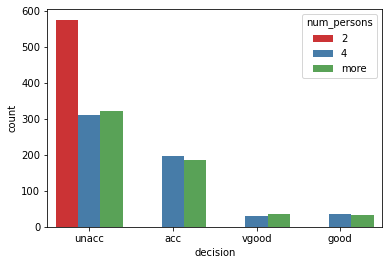

In [12]:
sns.countplot(x = 'decision', hue = 'num_persons', data = car_data, palette = "Set1")

### Here we can take a note for Decision is 'good' and 'vgood' when num_person is more than 2

<AxesSubplot:xlabel='decision', ylabel='count'>

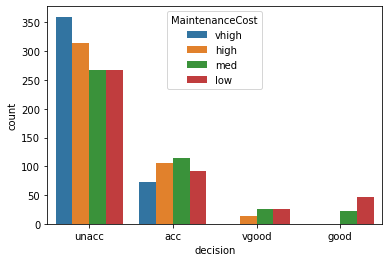

In [13]:
sns.countplot(x = 'decision', hue = 'MaintenanceCost', data = car_data)

### For car to evaluate to good and vgood Maintenance cost should not be very high 

<AxesSubplot:xlabel='decision', ylabel='count'>

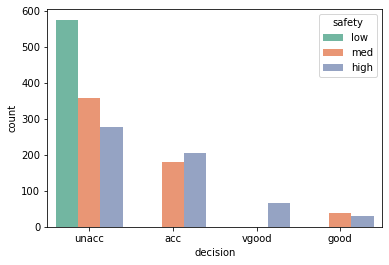

In [14]:
sns.countplot(x = 'decision', hue = 'safety', data = car_data, palette = "Set2" )


<AxesSubplot:xlabel='decision', ylabel='count'>

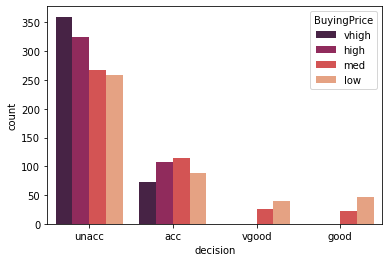

In [15]:
sns.countplot(x = 'decision', hue = 'BuyingPrice', data = car_data, palette = "rocket")

# Declaring predictor variables and target variable

In [16]:
X = car_data.drop(['decision'], axis=1)

y = car_data['decision']

# Feature Engineering


In [17]:
#checking the data types of variables again
X.dtypes

BuyingPrice        object
MaintenanceCost    object
num_Doors          object
num_persons        object
lug_boot           object
safety             object
dtype: object

encoding the categorical variables.

In [18]:
!pip install category_encoders 

In [19]:
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['BuyingPrice', 'MaintenanceCost', 'num_Doors', 'num_persons', 'lug_boot', 'safety'])


X = encoder.fit_transform(X)



In [20]:
X

,BuyingPrice,MaintenanceCost,num_Doors,num_persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


# Split Data - Training and Testing

In [21]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

# Decision Tree Classifier Criterion Entropy

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)


# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [24]:
y_pred_en = clf_entropy.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
#Checking Accuracy on testing data
accuracy_score(y_test,y_pred_en)

0.7976878612716763

In [27]:
y_pred_train_en = clf_entropy.predict(X_train)

In [28]:
#Checking Accuracy on training data
accuracy_score(y_train,y_pred_train_en)

0.7901591895803184

# Evaluating Model

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
# Classification report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.55      0.61      0.58        79
        good       0.00      0.00      0.00        17
       unacc       0.88      0.95      0.91       240
       vgood       0.00      0.00      0.00        10

    accuracy                           0.80       346
   macro avg       0.36      0.39      0.37       346
weighted avg       0.74      0.80      0.77       346



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#Confusion matrix
confusion_matrix(y_test, y_pred_en)

array([[ 48,   0,  31,   0],
       [ 17,   0,   0,   0],
       [ 12,   0, 228,   0],
       [ 10,   0,   0,   0]])

Here the training_set accuracy score is 0.7901 while the test-set accuracy is 0.7976. These 2 values are almost close so overfitting is not detected

# Visualise Decision Trees

[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\nentropy = 1.203\nsamples = 1382\nvalue = [305, 52, 970, 55]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 470\nvalue = [0, 0, 470, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 912\nvalue = [305, 52, 500, 55]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\nentropy = 1.643\nsamples = 604\nvalue = [305, 52, 192, 55]'),
 Text(0.5, 0.125, 'entropy = 0.999\nsamples = 307\nvalue = [149, 0, 158, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.737\nsamples = 297\nvalue = [156, 52, 34, 55]')]

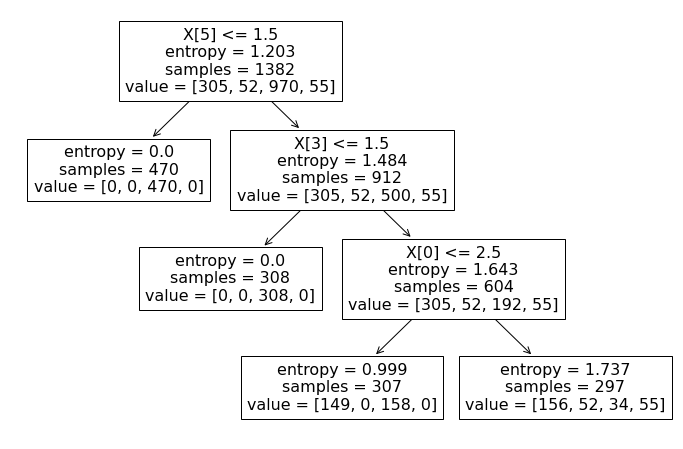

In [32]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(clf_entropy.fit(X_train, y_train))

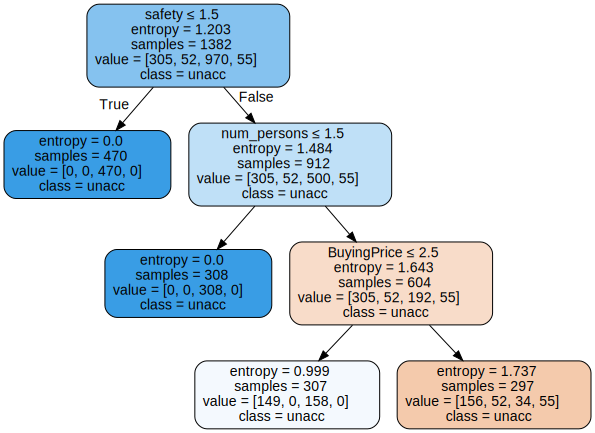

In [33]:
import graphviz
dt = tree.export_graphviz(clf_entropy, out_file = None, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True, special_characters = True)

graphviz.Source(dt)


## Built a model with Decision Tree classifier with entropy to predict safety of the car and the model has a  good perfomance with a accuracy score of .79 and the model is not suffering from overfitting  

### We have come to an end to this kernel, do let me know how you like it and give your feedback for improvments 